In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from dotenv import load_dotenv
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
load_dotenv()

True

In [2]:
# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)
    data = response.read().decode("utf-8")
    return json.loads(data)

# FMP Base URL
base_url = "https://financialmodelingprep.com/api/v3/"

# Financial Modeling Prep API demo version only provides AAPL
apiKey = os.getenv('apiKey')
ticker = 'TGT'

q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + str(apiKey)))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')
q_cash_flow_statement.iloc[:,4:].head()

,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2023-07-29,NaN,2024,NaN,835000000,683000000,46000000,64000000,483000000,0,-68000000,...,-618000000,0,296000000,1617000000,1321000000,2133000000,-1220000000,913000000,NaN,NaN
2023-04-29,NaN,2024,NaN,950000000,667000000,95000000,43000000,-479000000,0,883000000,...,-571000000,0,-908000000,1321000000,2229000000,1265000000,-1605000000,-340000000,NaN,NaN
2023-01-28,NaN,2023,NaN,876000000,696000000,34000000,43000000,1786000000,0,3618000000,...,-990000000,0,1275000000,2229000000,954000000,3466000000,-1205000000,2261000000,NaN,NaN
2022-10-29,NaN,2023,NaN,712000000,675000000,321000000,55000000,-1197000000,0,-1797000000,...,1023000000,0,-163000000,954000000,1117000000,599000000,-1800000000,-1201000000,NaN,NaN


In [3]:
# Annual Cash Flows
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

# Combine TTM CF with Annual Cash Flows
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24672\3417539757.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)


,acceptedDate,calendarYear,period,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,0.0,8094.0,0.0,2.721000e+09,496000000.0,205000000.0,5.930000e+08,0.0,2.636000e+09,-2.590000e+09,...,-1.156000e+09,0.0,5.000000e+08,6.121000e+09,5.621000e+09,7.463000e+09,-5.830000e+09,1.633000e+09,0.0,0.0
2023-01-28,NaN,2023.0,NaN,2.700000e+09,582000000.0,220000000.0,-2.436000e+09,0.0,4.030000e+08,-2.237000e+09,...,-2.196000e+09,0.0,-3.682000e+09,2.229000e+09,5.911000e+09,4.018000e+09,-5.528000e+09,-1.510000e+09,NaN,NaN
2022-01-29,NaN,2022.0,NaN,2.642000e+09,522000000.0,228000000.0,-1.445000e+09,0.0,-3.249000e+09,2.628000e+09,...,-8.071000e+09,0.0,-2.600000e+09,5.911000e+09,8.511000e+09,8.625000e+09,-3.544000e+09,5.081000e+09,NaN,NaN
2021-01-30,NaN,2021.0,NaN,2.485000e+09,-184000000.0,200000000.0,3.058000e+09,0.0,-1.661000e+09,2.925000e+09,...,-2.000000e+09,0.0,5.934000e+09,8.511000e+09,2.577000e+09,1.052500e+10,-2.649000e+09,7.876000e+09,NaN,NaN
2020-02-01,NaN,2020.0,NaN,2.604000e+09,178000000.0,147000000.0,8.620000e+08,0.0,5.050000e+08,1.400000e+08,...,-3.152000e+09,0.0,1.021000e+09,2.577000e+09,1.556000e+09,7.117000e+09,-3.027000e+09,4.090000e+09,NaN,NaN


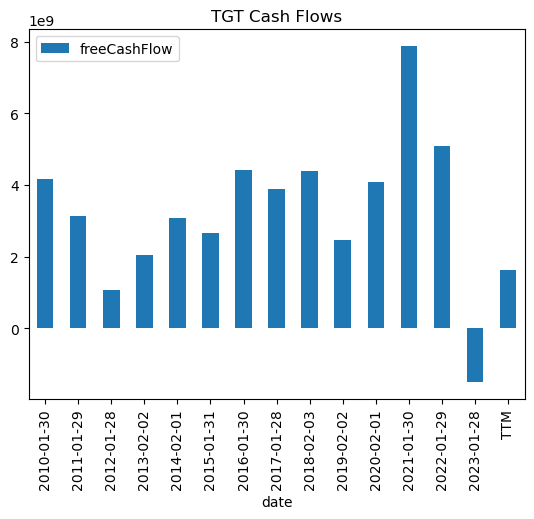

In [4]:
# Check Stability of FCF
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [5]:
# Quarterly Balance Sheet
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2023-07-29,NaN,2024,NaN,1617000000,739000000,1617000000,0,12684000000,1797000000,16098000000,...,11990000000,11990000000,53206000000,0,53206000000,739000000,18830000000,17213000000,NaN,NaN
2023-04-29,NaN,2024,NaN,1321000000,0,1321000000,0,12616000000,1836000000,15773000000,...,11605000000,11605000000,52150000000,0,52150000000,0,18831000000,17510000000,NaN,NaN
2023-01-28,NaN,2023,NaN,2229000000,1343000000,2229000000,1695000000,13499000000,2118000000,17846000000,...,11232000000,11232000000,53335000000,0,53335000000,1783000000,18777000000,16548000000,NaN,NaN
2022-10-29,NaN,2023,NaN,954000000,0,954000000,0,17117000000,2322000000,20393000000,...,11019000000,11019000000,55615000000,0,55615000000,0,19034000000,18080000000,NaN,NaN
2022-07-30,NaN,2023,NaN,1117000000,0,1117000000,0,15320000000,2016000000,18453000000,...,10592000000,10592000000,52470000000,0,52470000000,0,17645000000,16528000000,NaN,NaN


In [6]:
q_income_statement = pd.DataFrame(get_jsonparsed_data(base_url+'income-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_income_statement = q_income_statement.set_index('date')
q_income_statement = q_income_statement.apply(pd.to_numeric, errors='coerce')
q_income_statement.iloc[:,4:].head()

,acceptedDate,calendarYear,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2023-07-29,NaN,2024,NaN,24773000000,17798000000,6975000000,0.281557,0,0,0,...,0.043273,237000000,835000000,0.033706,1.81,1.80,461600000,462500000,NaN,NaN
2023-04-29,NaN,2024,NaN,25322000000,18386000000,6936000000,0.273912,0,0,0,...,0.047548,254000000,950000000,0.037517,2.06,2.05,460900000,462900000,NaN,NaN
2023-01-28,NaN,2023,NaN,31395000000,23946000000,7449000000,0.237267,0,0,0,...,0.033222,167000000,876000000,0.027903,1.90,1.89,460300000,462700000,NaN,NaN
2022-10-29,NaN,2023,NaN,26518000000,19680000000,6838000000,0.257863,0,0,0,...,0.034279,197000000,712000000,0.026850,1.55,1.54,460300000,462500000,NaN,NaN
2022-07-30,NaN,2023,NaN,26037000000,20142000000,5895000000,0.226409,0,0,0,...,0.008334,34000000,183000000,0.007028,0.40,0.39,461500000,463600000,NaN,NaN


In [7]:
# Free Cash Flow, Total Debt, Cash & Short Term Investments
shares_outstanding = q_income_statement.iloc[0]['weightedAverageShsOutDil']
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Shares Outstanding: ", shares_outstanding)                                                
print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Shares Outstanding:  462500000.0
Free Cash Flow:  1633000000.0
Total Debt:  18830000000.0
Cash and ST Investments:  1617000000.0


Discounted Cash Flows

Year 1: $1580322580.6451614
Year 2: $1529344432.882414
Year 3: $1480010741.4991107
Year 4: $1432268459.5152683
Year 5: $1386066251.1438081
Terminal Value: $35604533105.85937


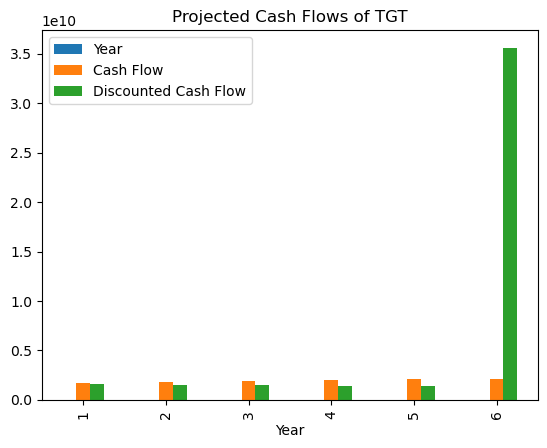

In [8]:
# Growth and Discount Rates
FCF_growth = .05
terminal_growth = .025
discount_rate = .085


def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                              FCF_growth, terminal_growth, shares_outstanding, discount_rate):   
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
        
    # Years 1 to 5 FCF
    for year in range(1, 6):
        year_list.append(year)
        cash_flow *= (1 + FCF_growth)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow / ((1 + discount_rate) ** year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted))
    
    # Terminal Value FCF
    year_list.append(year + 1)
    FCF_year_5 = cash_flow
    
    terminal_value = FCF_year_5 * (1 + terminal_growth) / (discount_rate - terminal_growth)
    cash_flow_discounted_list.append(terminal_value)
    cash_flow_list.append(FCF_year_5 * (1+terminal_growth))
    
    print("Terminal Value" + ": $" + str(terminal_value))
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments) / shares_outstanding
    
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title='Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value

# Call the function with defined variables
intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  FCF_growth, terminal_growth, shares_outstanding, discount_rate)

In [9]:
import yfinance as yf

stock = yf.Ticker(ticker)
current_share_price = stock.history(period='1d')['Close'][0]

print(f'Current Share Price of {ticker}: ${current_share_price:.2f}')

Current Share Price of TGT: $119.34


In [10]:
print("Intrinsic Value: ", intrinsic_value)
print("Current Price: ", current_share_price)
print("Margin of Safety: ", (1-current_share_price/intrinsic_value))  

Intrinsic Value:  55.78280123577325
Current Price:  119.33999633789062
Margin of Safety:  -1.1393690114894848
